# Figure maker
## Predicting the configuration of n atom arrays from probability graphs (data points)  
We used KAIST data (generated numerically) for different configurations of n atom arrays. 

## IMPORTANT: File names when importing
The order that the files are imported (and thus, the label for the configuration) will depend on the name of the file. Make sure to name the files you import with integers at the start  i.e. "n - " where $n \geq 0$ . As an example:

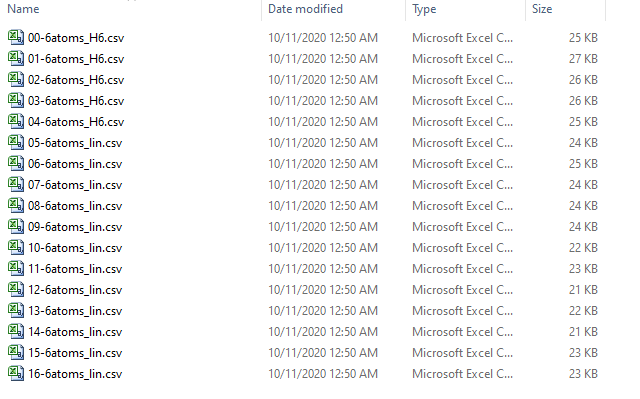

Then, the code below will import the file with the number 00 first, then 01, and so on.

In [1]:
import os
import pandas as pd
import numpy as np

# input the path to the folder that ONLY contains the data you want to import
# make sure there are no other files in the folder
# files_folder_path = "/Users/darylryanchong/Documents/Code/Dr Heejeong - UM Research/Project 1 - Machine learning of configuration from probability graphs/12.2.2021 KAIST Data/data 6atoms N300 V13"

files_folder_path = "/Users/darylryanchong/Documents/Code/Dr Heejeong - UM Research/Project 1 - Machine learning of configuration from probability graphs/12.2.2021 KAIST Data/data 6atoms lin N300 V13"
data_files = os.listdir(files_folder_path)
data_files.sort()

dict_files = {}
for i in range(0, len(data_files)):
    # windows
    #     df = pd.read_csv(files_folder_path + '\\' + data_files[i],header=None)
    # mac
    df = pd.read_csv(files_folder_path + '/' + data_files[i],header=None)

    # removing the time column
    df = df.iloc[:,1:]
    
    df = df.T
    
    config_list = [i]*df.shape[0]
    config = np.array(config_list)
    df.insert(0, "Configuration", config)
    dict_files["df{0}".format(i)] = df

dict_files.keys()

dict_keys(['df0', 'df1', 'df2', 'df3', 'df4', 'df5', 'df6', 'df7', 'df8', 'df9', 'df10', 'df11'])

In [2]:
import sklearn

print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.1.


# Files that were imported

In [3]:
data_files

['00-6atoms_lin_N0.csv',
 '01-6atoms_lin_Nr11.csv',
 '02-6atoms_lin_Nr12.csv',
 '03-6atoms_lin_Nr13.csv',
 '04-6atoms_lin_Nr21.csv',
 '05-6atoms_lin_Nr22.csv',
 '06-6atoms_lin_Nr23.csv',
 '07-6atoms_lin_Nr24.csv',
 '08-6atoms_lin_Nr25.csv',
 '09-6atoms_lin_Nr26.csv',
 '10-6atoms_lin_Nr31.csv',
 '11-6atoms_lin_Nr32.csv']

# Combining all the data into one pandas dataframe

In [4]:
keys = list(dict_files.keys())

frames = []
for i in keys:
    frames.append(dict_files[i])

df = pd.concat(frames)
df.index = list(range(1,df.shape[0]+1))

print("*The \"Configuration\" column in the df below corresponds to the number in the name of the file which the data was from.")
display(df)

*The "Configuration" column in the df below corresponds to the number in the name of the file which the data was from.


,Configuration,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
1,0,1.0,0.85,0.80,0.15,0.15,0.00,0.05,0.00,0.10,...,0.15,0.20,0.00,0.20,0.10,0.15,0.10,0.10,0.10,0.00
2,0,1.0,0.80,0.60,0.30,0.05,0.00,0.00,0.00,0.05,...,0.10,0.05,0.10,0.15,0.25,0.05,0.20,0.10,0.15,0.10
3,0,1.0,0.90,0.40,0.20,0.05,0.00,0.00,0.05,0.10,...,0.20,0.10,0.05,0.05,0.20,0.25,0.10,0.15,0.05,0.15
4,0,1.0,0.75,0.45,0.25,0.05,0.00,0.00,0.00,0.00,...,0.15,0.10,0.25,0.15,0.00,0.35,0.20,0.10,0.05,0.00
5,0,1.0,0.80,0.65,0.20,0.15,0.05,0.00,0.00,0.10,...,0.05,0.05,0.15,0.10,0.20,0.10,0.35,0.15,0.15,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3596,11,0.0,0.00,0.00,0.05,0.00,0.05,0.20,0.25,0.15,...,0.10,0.00,0.00,0.00,0.05,0.05,0.10,0.05,0.00,0.15
3597,11,0.0,0.00,0.00,0.00,0.00,0.10,0.10,0.10,0.30,...,0.20,0.05,0.00,0.00,0.00,0.10,0.15,0.10,0.10,0.15
3598,11,0.0,0.00,0.00,0.00,0.05,0.20,0.30,0.45,0.15,...,0.15,0.10,0.00,0.10,0.10,0.15,0.10,0.10,0.15,0.20
3599,11,0.0,0.00,0.00,0.00,0.00,0.05,0.15,0.05,0.30,...,0.10,0.10,0.00,0.10,0.00,0.05,0.10,0.05,0.15,0.10


In [5]:
display(df.iloc[295:305,8:])

,7,8,9,10,11,12,13,14,15,16,17,18,19,20
296,0.00,0.05,0.05,0.05,0.05,0.15,0.15,0.15,0.10,0.20,0.25,0.10,0.10,0.10
297,0.00,0.00,0.20,0.05,0.10,0.10,0.10,0.05,0.10,0.15,0.10,0.30,0.05,0.05
298,0.00,0.00,0.05,0.05,0.10,0.05,0.05,0.10,0.15,0.20,0.10,0.05,0.05,0.05
299,0.00,0.00,0.00,0.00,0.05,0.10,0.20,0.05,0.30,0.35,0.20,0.10,0.05,0.00
300,0.00,0.00,0.05,0.05,0.05,0.05,0.25,0.10,0.15,0.25,0.20,0.05,0.05,0.05
301,0.05,0.00,0.05,0.05,0.05,0.15,0.35,0.05,0.15,0.15,0.05,0.10,0.05,0.10
302,0.05,0.05,0.15,0.05,0.15,0.15,0.30,0.20,0.00,0.20,0.05,0.00,0.05,0.05
303,0.05,0.05,0.15,0.15,0.10,0.15,0.30,0.10,0.05,0.00,0.15,0.05,0.05,0.05
304,0.05,0.00,0.05,0.00,0.15,0.40,0.05,0.15,0.15,0.00,0.00,0.05,0.05,0.10
305,0.00,0.05,0.10,0.05,0.20,0.20,0.10,0.25,0.10,0.00,0.00,0.10,0.00,0.15


# Stratified sampling

This means that the training set has the same proportions of each configuration as the initial data set.

## Input pecentage of the data to use below:

In [6]:
percentage_of_data_to_use = 1.0 # must be a float (decimal) 

In [7]:
from sklearn.model_selection import train_test_split

if percentage_of_data_to_use == 1.0:
    train_set, test_set = train_test_split(df, test_size=0.2, random_state=42, stratify = df["Configuration"])

else:
    train_set, test_set = train_test_split(df, test_size=percentage_of_data_to_use, random_state=42, stratify = df["Configuration"])
    train_set, test_set = train_test_split(test_set, test_size=0.2, random_state=42, stratify = test_set["Configuration"])

In [8]:
train_set

,Configuration,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
2422,8,0.0,0.00,0.00,0.00,0.10,0.05,0.10,0.10,0.05,...,0.00,0.05,0.00,0.05,0.05,0.05,0.00,0.05,0.05,0.05
180,0,1.0,0.75,0.50,0.20,0.10,0.00,0.00,0.00,0.15,...,0.15,0.15,0.15,0.10,0.30,0.10,0.25,0.00,0.15,0.05
1424,4,0.0,0.00,0.00,0.10,0.05,0.10,0.10,0.05,0.05,...,0.15,0.10,0.00,0.05,0.10,0.05,0.05,0.05,0.05,0.05
2605,8,0.0,0.00,0.00,0.00,0.10,0.05,0.05,0.00,0.00,...,0.00,0.05,0.10,0.00,0.00,0.00,0.00,0.00,0.05,0.05
1901,6,0.0,0.00,0.00,0.00,0.10,0.05,0.10,0.15,0.05,...,0.00,0.00,0.00,0.00,0.05,0.30,0.00,0.25,0.15,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,4,0.0,0.00,0.00,0.00,0.05,0.00,0.00,0.05,0.05,...,0.25,0.20,0.20,0.15,0.05,0.05,0.00,0.00,0.05,0.20
1994,6,0.0,0.00,0.05,0.00,0.10,0.10,0.25,0.05,0.10,...,0.00,0.10,0.00,0.10,0.00,0.15,0.15,0.10,0.10,0.05
723,2,0.0,0.15,0.10,0.15,0.30,0.05,0.05,0.00,0.20,...,0.00,0.15,0.00,0.00,0.10,0.15,0.25,0.05,0.05,0.00
1206,4,0.0,0.00,0.00,0.05,0.10,0.10,0.05,0.10,0.10,...,0.10,0.15,0.20,0.10,0.00,0.10,0.10,0.05,0.05,0.15


In [9]:
X_train = train_set.iloc[0:,1:22].to_numpy()
y_train_na = train_set["Configuration"].to_numpy()
X_test = test_set.iloc[0:,1:22].to_numpy()
y_test_na = test_set["Configuration"].to_numpy()

In [10]:
# accuracy_score(y_test_na, predicted)
train_set["Configuration"].value_counts()

0     240
2     240
4     240
6     240
8     240
10    240
1     240
3     240
5     240
7     240
9     240
11    240
Name: Configuration, dtype: int64

# Train support vector machine (SVM) model

In [11]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

est = make_pipeline(StandardScaler(), SGDClassifier(random_state=42))

#train (fit) the SDG classifier with the training data
svm_clf = est.fit(X_train, y_train_na)

# Train random forest (RF) classifier 

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

est = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))

#train (fit) the RF classifier with the training data
rf_clf = est.fit(X_train, y_train_na)

# Evaluating the model

## SVM CI

In [13]:
from sklearn.metrics import accuracy_score

predicted = svm_clf.predict(X_test)

svm_gen_accuracy = accuracy_score(y_test_na, predicted)

#### Agresti–Coull interval ####

# number of correct predictions
X = accuracy_score(y_test_na, predicted, normalize=False) 
# number of samples
n = len(y_test_na)

z = 1.96 # 95% confidence interval

n_new = n + z**2
p_new = (X + z**2/2)/n_new
svm_margin_of_error = z*(p_new*(1 - p_new)/n_new)**0.5

In [14]:
svm_gen_accuracy

0.7513888888888889

In [15]:
X

541

In [16]:
svm_margin_of_error

0.031543018664533386

## RFC CI

In [17]:
predicted = rf_clf.predict(X_test)

rfc_gen_accuracy = accuracy_score(y_test_na, predicted)

#### Agresti–Coull interval ####

# number of correct predictions
X = accuracy_score(y_test_na, predicted, normalize=False) 
# number of samples
n = len(y_test_na)

z = 1.96 # 95% confidence interval

n_new = n + z**2
p_new = (X + z**2/2)/n_new
rfc_margin_of_error = z*(p_new*(1 - p_new)/n_new)**0.5

In [18]:
rfc_gen_accuracy 

0.8208333333333333

In [19]:
rfc_margin_of_error

0.028040995724757236

# Plot

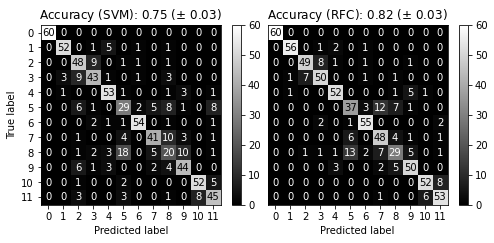

In [20]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# matplotlib.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(ncols = 2, nrows = 1, sharey=True)

svm_ax_cm = ax[0] #axis of confusion matrix

# default setting is cmap='viridis'
# plot_confusion_matrix(svm_clf, X_test, y_test_na, ax = svm_ax_cm, colorbar=False)

# grey

# plot_confusion_matrix(svm_clf, X_test, y_test_na, ax = svm_ax_cm, cmap='gray', colorbar=False)
plot_confusion_matrix(svm_clf, X_test, y_test_na, ax = svm_ax_cm, cmap='gray')
svm_ax_cm.set_title("Accuracy (SVM): %0.2f ($\pm$ %0.2f)" % (svm_gen_accuracy, svm_margin_of_error))


rfc_ax_cm = ax[1] #axis of confusion matrix
# default setting is cmap='viridis'
# plot_confusion_matrix(rf_clf, X_test, y_test_na, ax = rfc_ax_cm)

# grey
plot_confusion_matrix(rf_clf, X_test, y_test_na, ax = rfc_ax_cm, cmap='gray')
rfc_ax_cm.set_title("Accuracy (RFC): %0.2f ($\pm$ %0.2f)" % (rfc_gen_accuracy, rfc_margin_of_error))
rfc_ax_cm.get_yaxis().set_visible(False)

def cm_to_inch(value):
    return value/2.54

#figures are 14.75 cm wide and 12 cm high 

a = 0.7
# a = 0.8 # for N_ID >11
h = 12
w = 29.5

# fig.set_figheight(cm_to_inch(12))
# fig.set_figwidth(cm_to_inch(29.5))

fig.set_figheight(cm_to_inch(a*h))
fig.set_figwidth(cm_to_inch(a*w))

# fig.set_figheight(cm_to_inch(6))
# fig.set_figwidth(cm_to_inch(14.75))

plt.subplots_adjust(wspace=0, hspace=0)


# fig.suptitle(t='(a) linear chain', x=0.24, y=1,fontsize=16)


plt.show()

In [21]:
# side by side full

# %matplotlib inline
# import matplotlib
# import matplotlib.pyplot as plt
# from sklearn.metrics import plot_confusion_matrix

# # fig, ax = plt.subplots(ncols = 2, nrows = 1, sharey=True)
# fig, ax = plt.subplots(ncols = 2, nrows = 1)


# svm_ax_cm = ax[0] #axis of confusion matrix

# # default setting is cmap='viridis'
# # plot_confusion_matrix(svm_clf, X_test, y_test_na, ax = svm_ax_cm, colorbar=False)

# # grey
# plot_confusion_matrix(svm_clf, X_test, y_test_na, ax = svm_ax_cm, cmap='gray',colorbar=False)
# svm_ax_cm.set_title("Accuracy (SVM): %0.2f ($\pm$ %0.2f)" % (svm_gen_accuracy, svm_margin_of_error))

# # , colorbar=False
# rfc_ax_cm = ax[1] #axis of confusion matrix
# # default setting is cmap='viridis'
# # plot_confusion_matrix(rf_clf, X_test, y_test_na, ax = rfc_ax_cm)

# # grey
# plot_confusion_matrix(rf_clf, X_test, y_test_na, ax = rfc_ax_cm, cmap='gray')
# rfc_ax_cm.set_title("Accuracy (RFC): %0.2f ($\pm$ %0.2f)" % (rfc_gen_accuracy, rfc_margin_of_error))
# # rfc_ax_cm.get_yaxis().set_visible(False)

# def cm_to_inch(value):
#     return value/2.54

# #figures are 14.75 cm wide and 12 cm high 
# fig.set_figheight(cm_to_inch(12))
# fig.set_figwidth(cm_to_inch(29.5))

# # fig.set_figheight(cm_to_inch(25))
# # fig.set_figwidth(cm_to_inch(14.75))
# plt.subplots_adjust(wspace=0, hspace=0)
# # fig.suptitle(t='(a) linear chain', x=0.24, y=1,fontsize=16)

# plt.show()

## Using cross validation (RFC)

In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_clf, X_train, y_train_na, cv=10, scoring="accuracy")
scores

array([0.82291667, 0.80902778, 0.82638889, 0.81944444, 0.80555556,
       0.78819444, 0.83333333, 0.84375   , 0.81597222, 0.82986111])

## 95% confidence interval of the score estimate

In [23]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.82 (+/- 0.03)
